Handwritten Digits using Pytorch

In [1]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
#Transform pipeline to preprocess images and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
#Load the Dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 46415139.33it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 59643374.61it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 20674012.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 5446120.29it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
#Inspect shape and verify images are normalized
trainset[0][0].shape, trainset[0][0].min(), trainset[0][0].max()

(torch.Size([1, 28, 28]), tensor(-1.), tensor(1.))

In [6]:
#Create loaders to handle batching and shuffling
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print("Training data shape:", len(trainset))
print("Test data shape:", len(testset))

Training data shape: 60000
Test data shape: 10000


In [7]:
#Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()  # Convert the PyTorch tensor to a NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose the array to match image format
    plt.show()

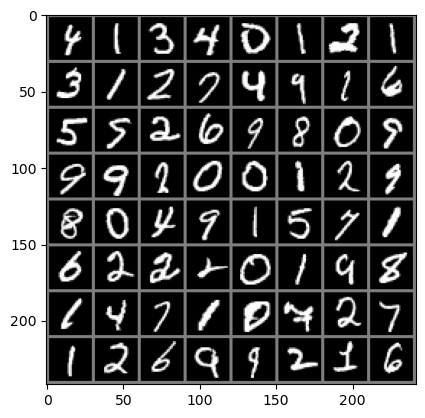

    4     1     3     4     0     1     2     1


In [8]:
#Get and display random images with the top row of labels
#Get Random images
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]:5d}' for j in range(8)))

In [9]:
#Define the neural net and inheret from the nn.Module, define the forward pass 
#(tested softmax output but got poor results)

class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        # self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        # x = self.softmax(x)
        return x
    
model = DigitClassifier()

In [10]:
#Define the loss and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [11]:
#Build the training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')
print('Training Complete')

Epoch 1, Loss: 0.3704502946182863
Epoch 2, Loss: 0.17796415500025123
Epoch 3, Loss: 0.1318183244803726
Epoch 4, Loss: 0.10816955910836741
Epoch 5, Loss: 0.09186685541823411
Epoch 6, Loss: 0.07985744838402278
Epoch 7, Loss: 0.07011783528757264
Epoch 8, Loss: 0.0629547092460914
Epoch 9, Loss: 0.05565540268540636
Epoch 10, Loss: 0.05147960175996396
Training Complete


In [12]:
#Build the evaluation method
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        
accuracy = (correct / total) * 100

print(f'Accuracy: {accuracy: .2f}%')

Accuracy:  97.66%
